In [27]:
install.packages("mlbench")
library(mlbench)

Warning message in system2(cmd0, args, env = env, stdout = outfile, stderr = outfile):
“system call failed: Cannot allocate memory”Warning message in install.packages("mlbench"):
“installation of package ‘mlbench’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [28]:
data(BostonHousing2); bh2 <- BostonHousing2

# indexing dataframe using Census tract code
rownames(bh2) <- bh2$tract

# removing attributes in updated dataset BostonHousing2 and not in original BostonHousing except tract (Census tract code)
bh2 <- subset(bh2, select = -c(cmedv, town, lon, lat, tract))

In [29]:
#check for redundancy in the data
# Let's examine redundancy by dropping a feature and seeing if the other features can predict it.
install.packages('rpart')

Warning message in system2(cmd0, args, env = env, stdout = outfile, stderr = outfile):
“system call failed: Cannot allocate memory”Warning message in install.packages("rpart"):
“installation of package ‘rpart’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [30]:
library(caret)
library(rpart)

In [31]:
bh2_numeric_feat <- Filter(is.numeric, bh2)
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

for (itn in 1:length(colnames(bh2_numeric_feat))) {
    feat = colnames(bh2_numeric_feat)[itn]
    print(paste(feat, ": ", calculate_r_2_for_feature(data = bh2_numeric_feat, feat)))
}

[1] "medv :  0.657607205709633"
[1] "crim :  0.628070400505079"
[1] "zn :  0.884416946412948"
[1] "indus :  0.929412922982456"
[1] "nox :  0.840578288664655"
[1] "rm :  0.619076874485782"
[1] "age :  0.791840561505083"
[1] "dis :  0.865790063952491"
[1] "rad :  0.87780797917673"
[1] "tax :  0.920879954905698"
[1] "ptratio :  0.77595278231276"
[1] "b :  0.183932279638022"
[1] "lstat :  0.650027783602214"


But this is subject to randomness. There is randomness in my `train_test_split`. Let's do the whole thing many times and take the average. 

In [32]:
mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

for (itn in 1:length(colnames(bh2_numeric_feat))) {
    mean_r2_for_feature(data = bh2_numeric_feat, feature = colnames(bh2_numeric_feat)[itn])
}

for (itn in 1:length(colnames(bh2_numeric_feat))) {
    mean_r2_for_feature(data = bh2_numeric_feat, feature = colnames(bh2_numeric_feat)[itn])
}


In [33]:
# check for correlation in the data
bh2_cor <- cor(bh2_numeric_feat)
bh2_cor

,medv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
medv,1.0000000,-0.3883046,0.3604453,-0.4837252,-0.4273208,0.6953599,-0.3769546,0.2499287,-0.3816262,-0.4685359,-0.5077867,0.3334608,-0.7376627
crim,-0.3883046,1.0000000,-0.2004692,0.4065834,0.4209717,-0.2192467,0.3527343,-0.3796701,0.6255051,0.5827643,0.2899456,-0.3850639,0.4556215
zn,0.3604453,-0.2004692,1.0000000,-0.5338282,-0.5166037,0.3119906,-0.5695373,0.6644082,-0.3119478,-0.3145633,-0.3916785,0.1755203,-0.4129946
indus,-0.4837252,0.4065834,-0.5338282,1.0000000,0.7636514,-0.3916759,0.6447785,-0.7080270,0.5951293,0.7207602,0.3832476,-0.3569765,0.6037997
nox,-0.4273208,0.4209717,-0.5166037,0.7636514,1.0000000,-0.3021882,0.7314701,-0.7692301,0.6114406,0.6680232,0.1889327,-0.3800506,0.5908789
rm,0.6953599,-0.2192467,0.3119906,-0.3916759,-0.3021882,1.0000000,-0.2402649,0.2052462,-0.2098467,-0.2920478,-0.3555015,0.1280686,-0.6138083
age,-0.3769546,0.3527343,-0.5695373,0.6447785,0.7314701,-0.2402649,1.0000000,-0.7478805,0.4560225,0.5064556,0.2615150,-0.2735340,0.6023385
dis,0.2499287,-0.3796701,0.6644082,-0.7080270,-0.7692301,0.2052462,-0.7478805,1.0000000,-0.4945879,-0.5344316,-0.2324705,0.2915117,-0.4969958
rad,-0.3816262,0.6255051,-0.3119478,0.5951293,0.6114406,-0.2098467,0.4560225,-0.4945879,1.0000000,0.9102282,0.4647412,-0.4444128,0.4886763
tax,-0.4685359,0.5827643,-0.3145633,0.7207602,0.6680232,-0.2920478,0.5064556,-0.5344316,0.9102282,1.0000000,0.4608530,-0.4418080,0.5439934


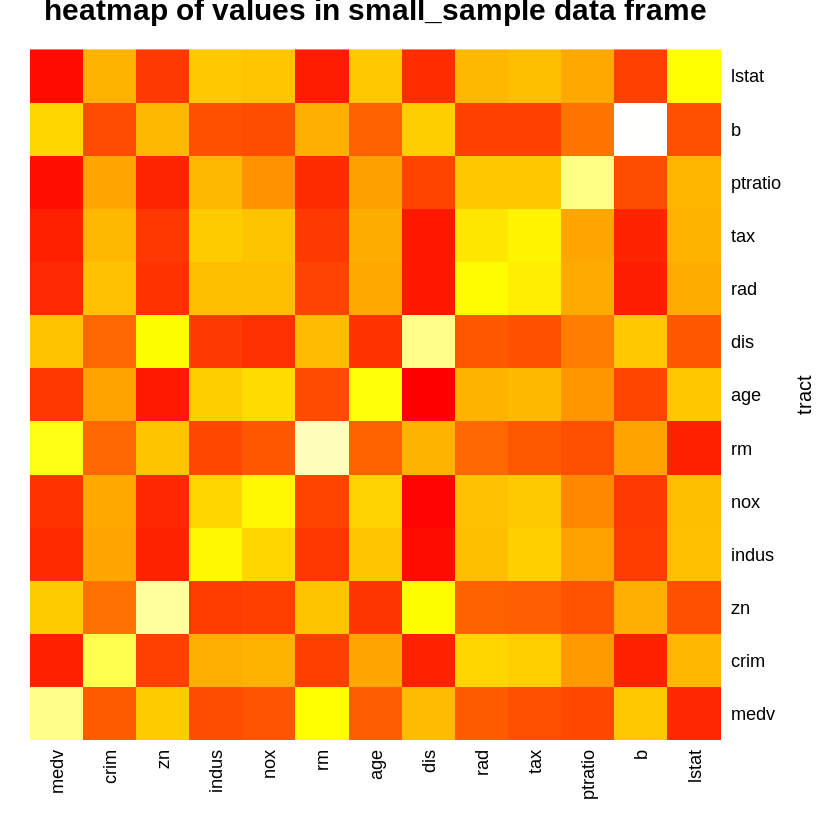

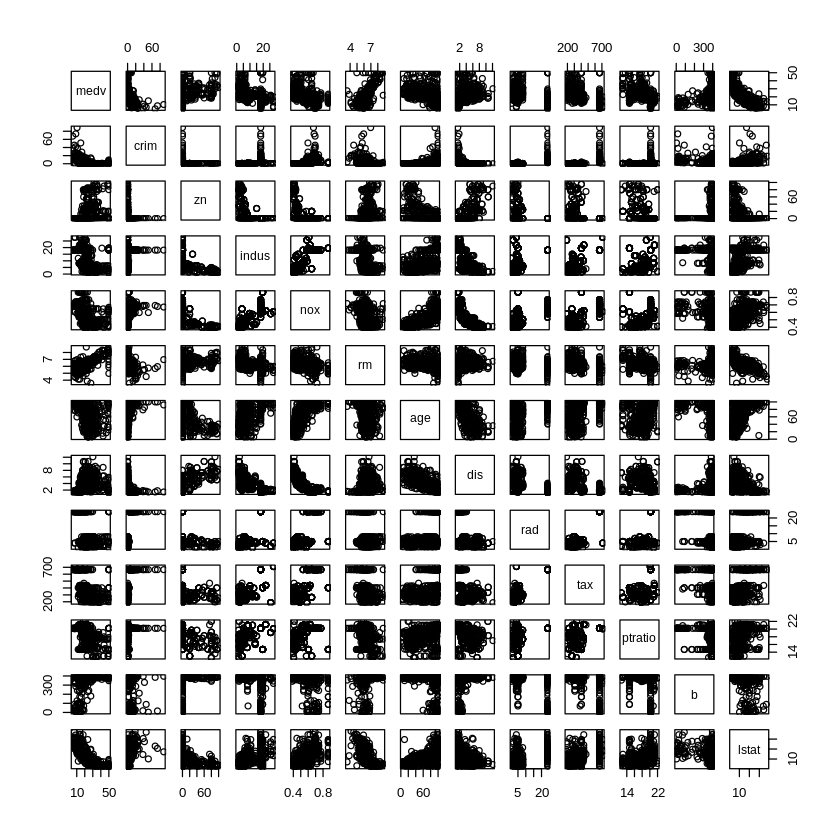

In [34]:
# prepare a heatmap of correlation and a pairplot of the data
bh2_cor_matrix <- data.matrix(bh2_cor)
heatmap(bh2_cor_matrix, Rowv = NA, Colv = NA, col = heat.colors(256),
        scale = "row", main = "heatmap of values in small_sample data frame",
       ylab = "tract")

pairs(bh2_numeric_feat)

##### discuss how the correlation can be seen in the pairplot
I can see that lstat and rm have a negative correlation. I can tell there is a correlation where the plots show a correlation.